In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [3]:
import torch

In [4]:
pip install opencv-python

In [5]:
!unzip -q /content/Butterfly.zip -d /content/

In [6]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Butterfly/images/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 219MB/s]
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Butterfly/images/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

In [7]:
!ls /content/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch90.jpg
confusion_matrix.png				    R_curve.png       train_batch91.jpg
events.out.tfevents.1709181125.b793439dfa2a.8151.0  results.csv       train_batch92.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


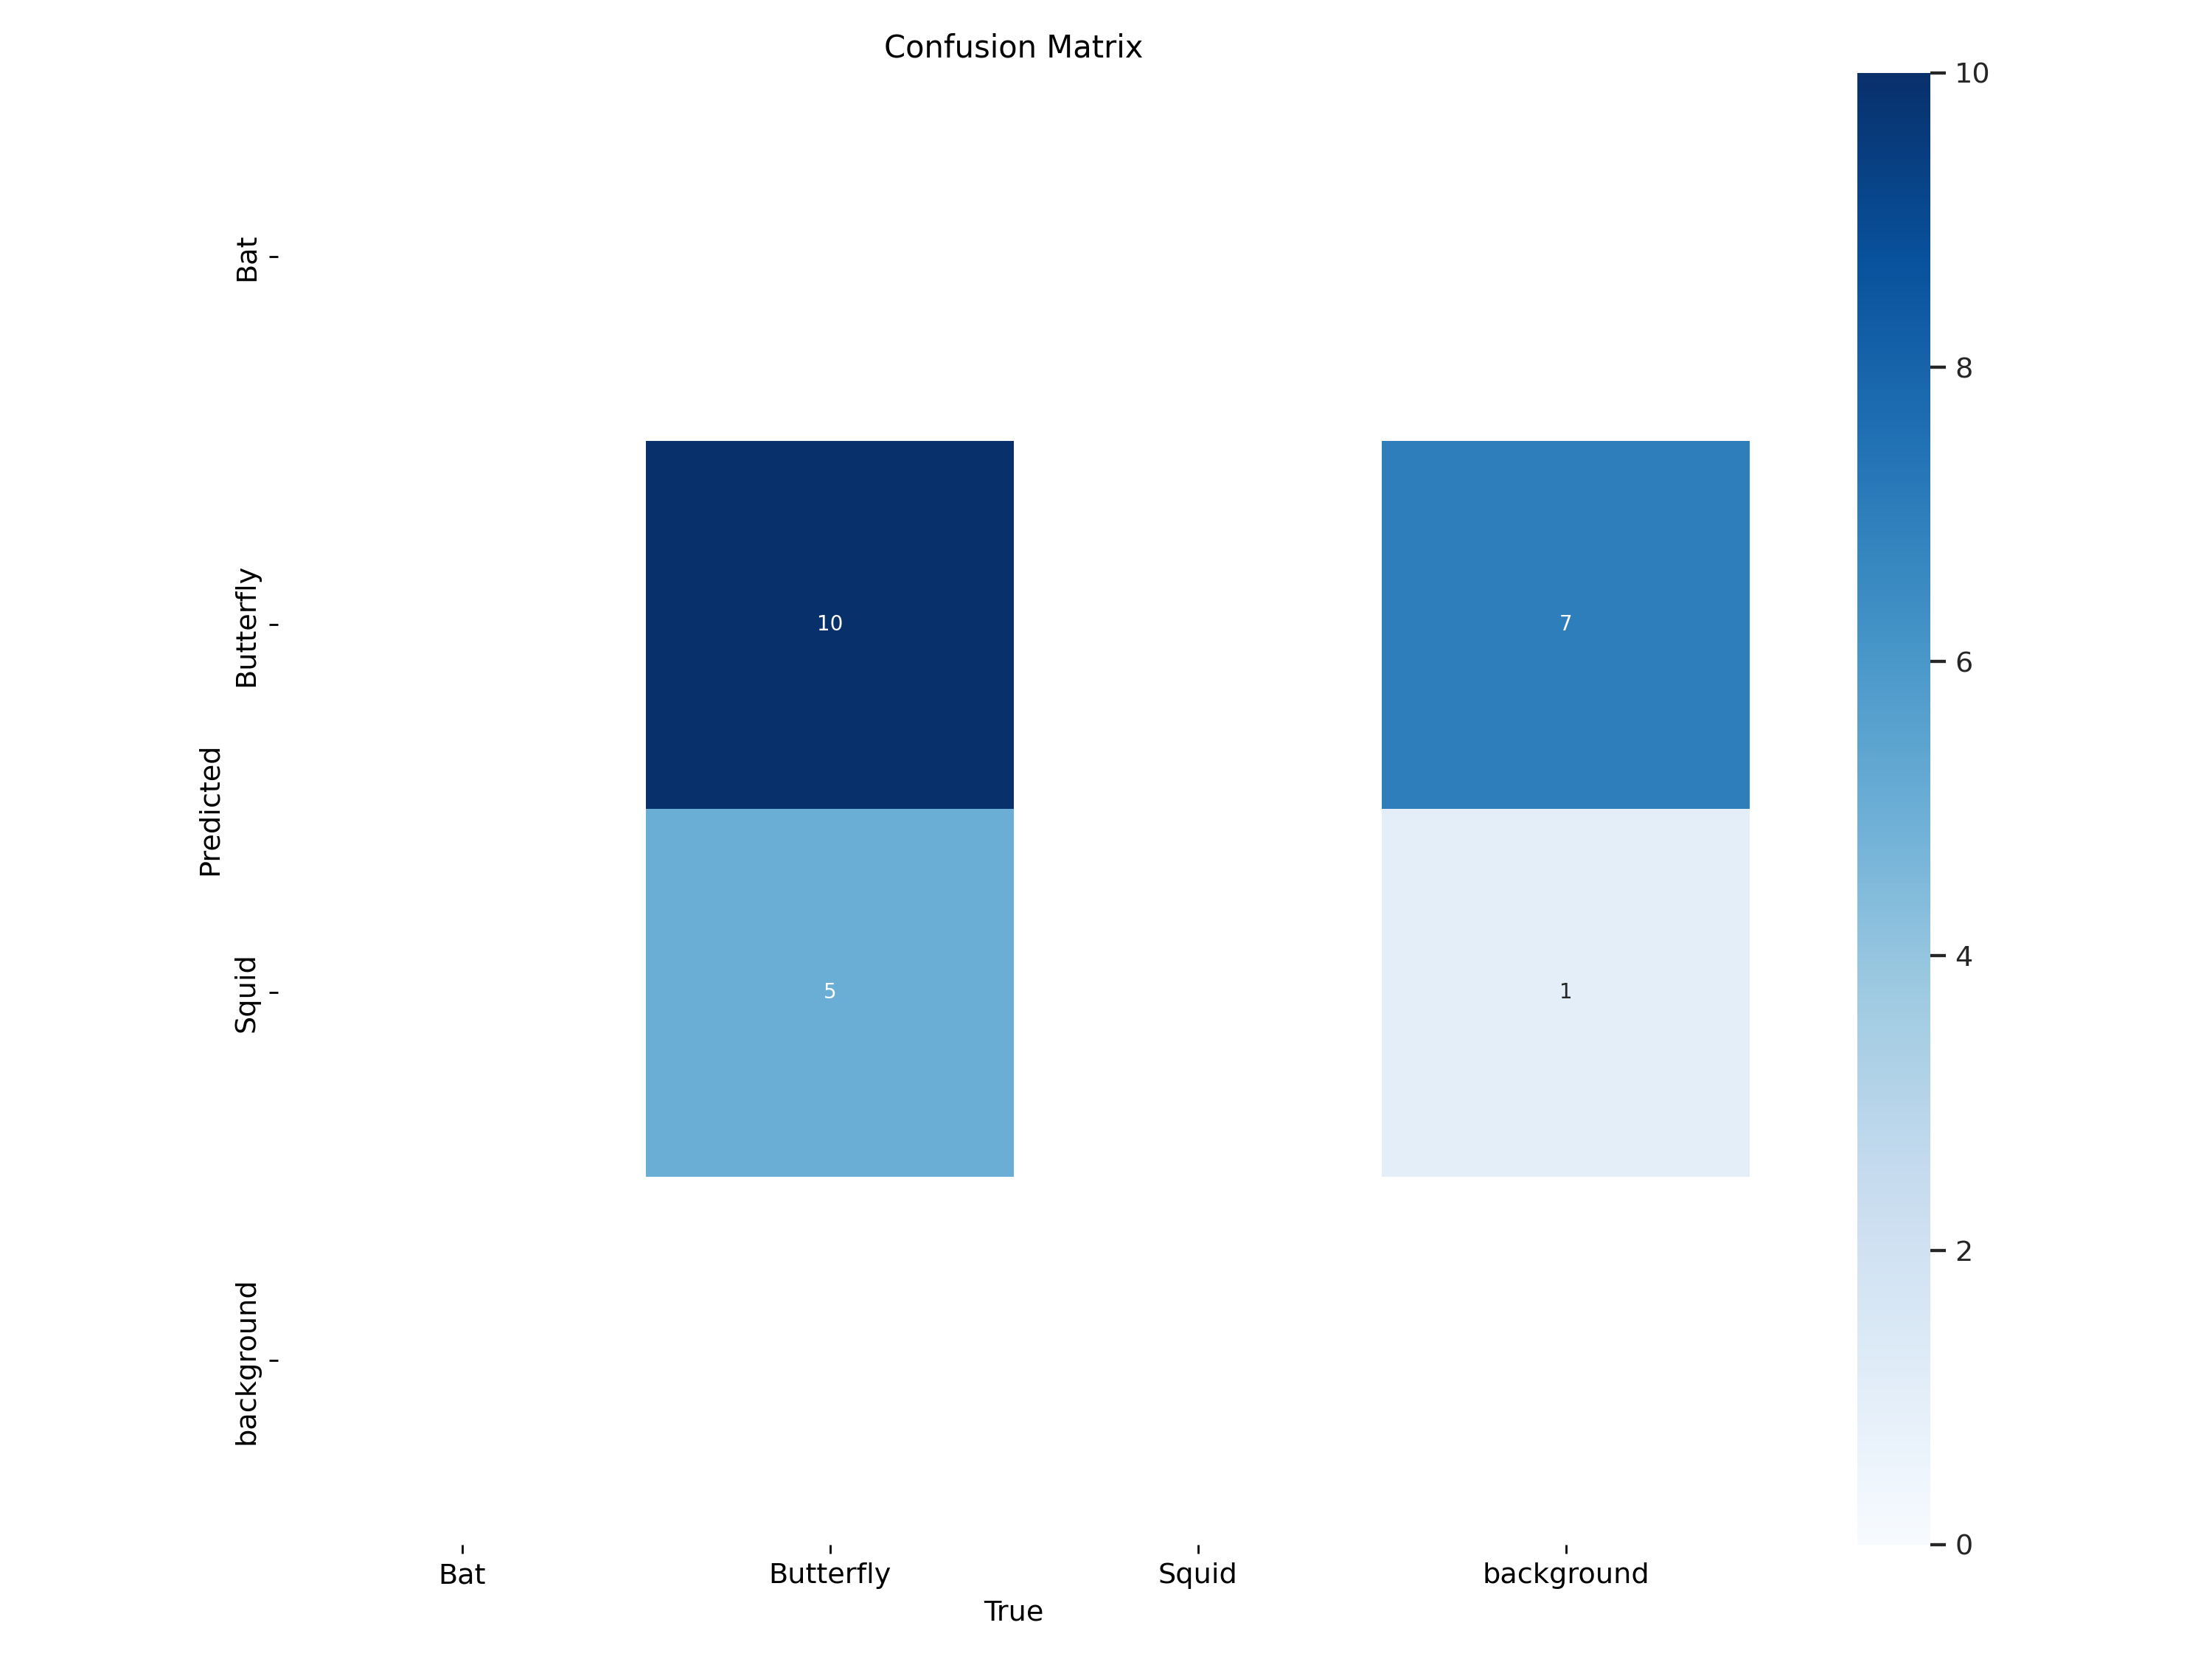

In [9]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

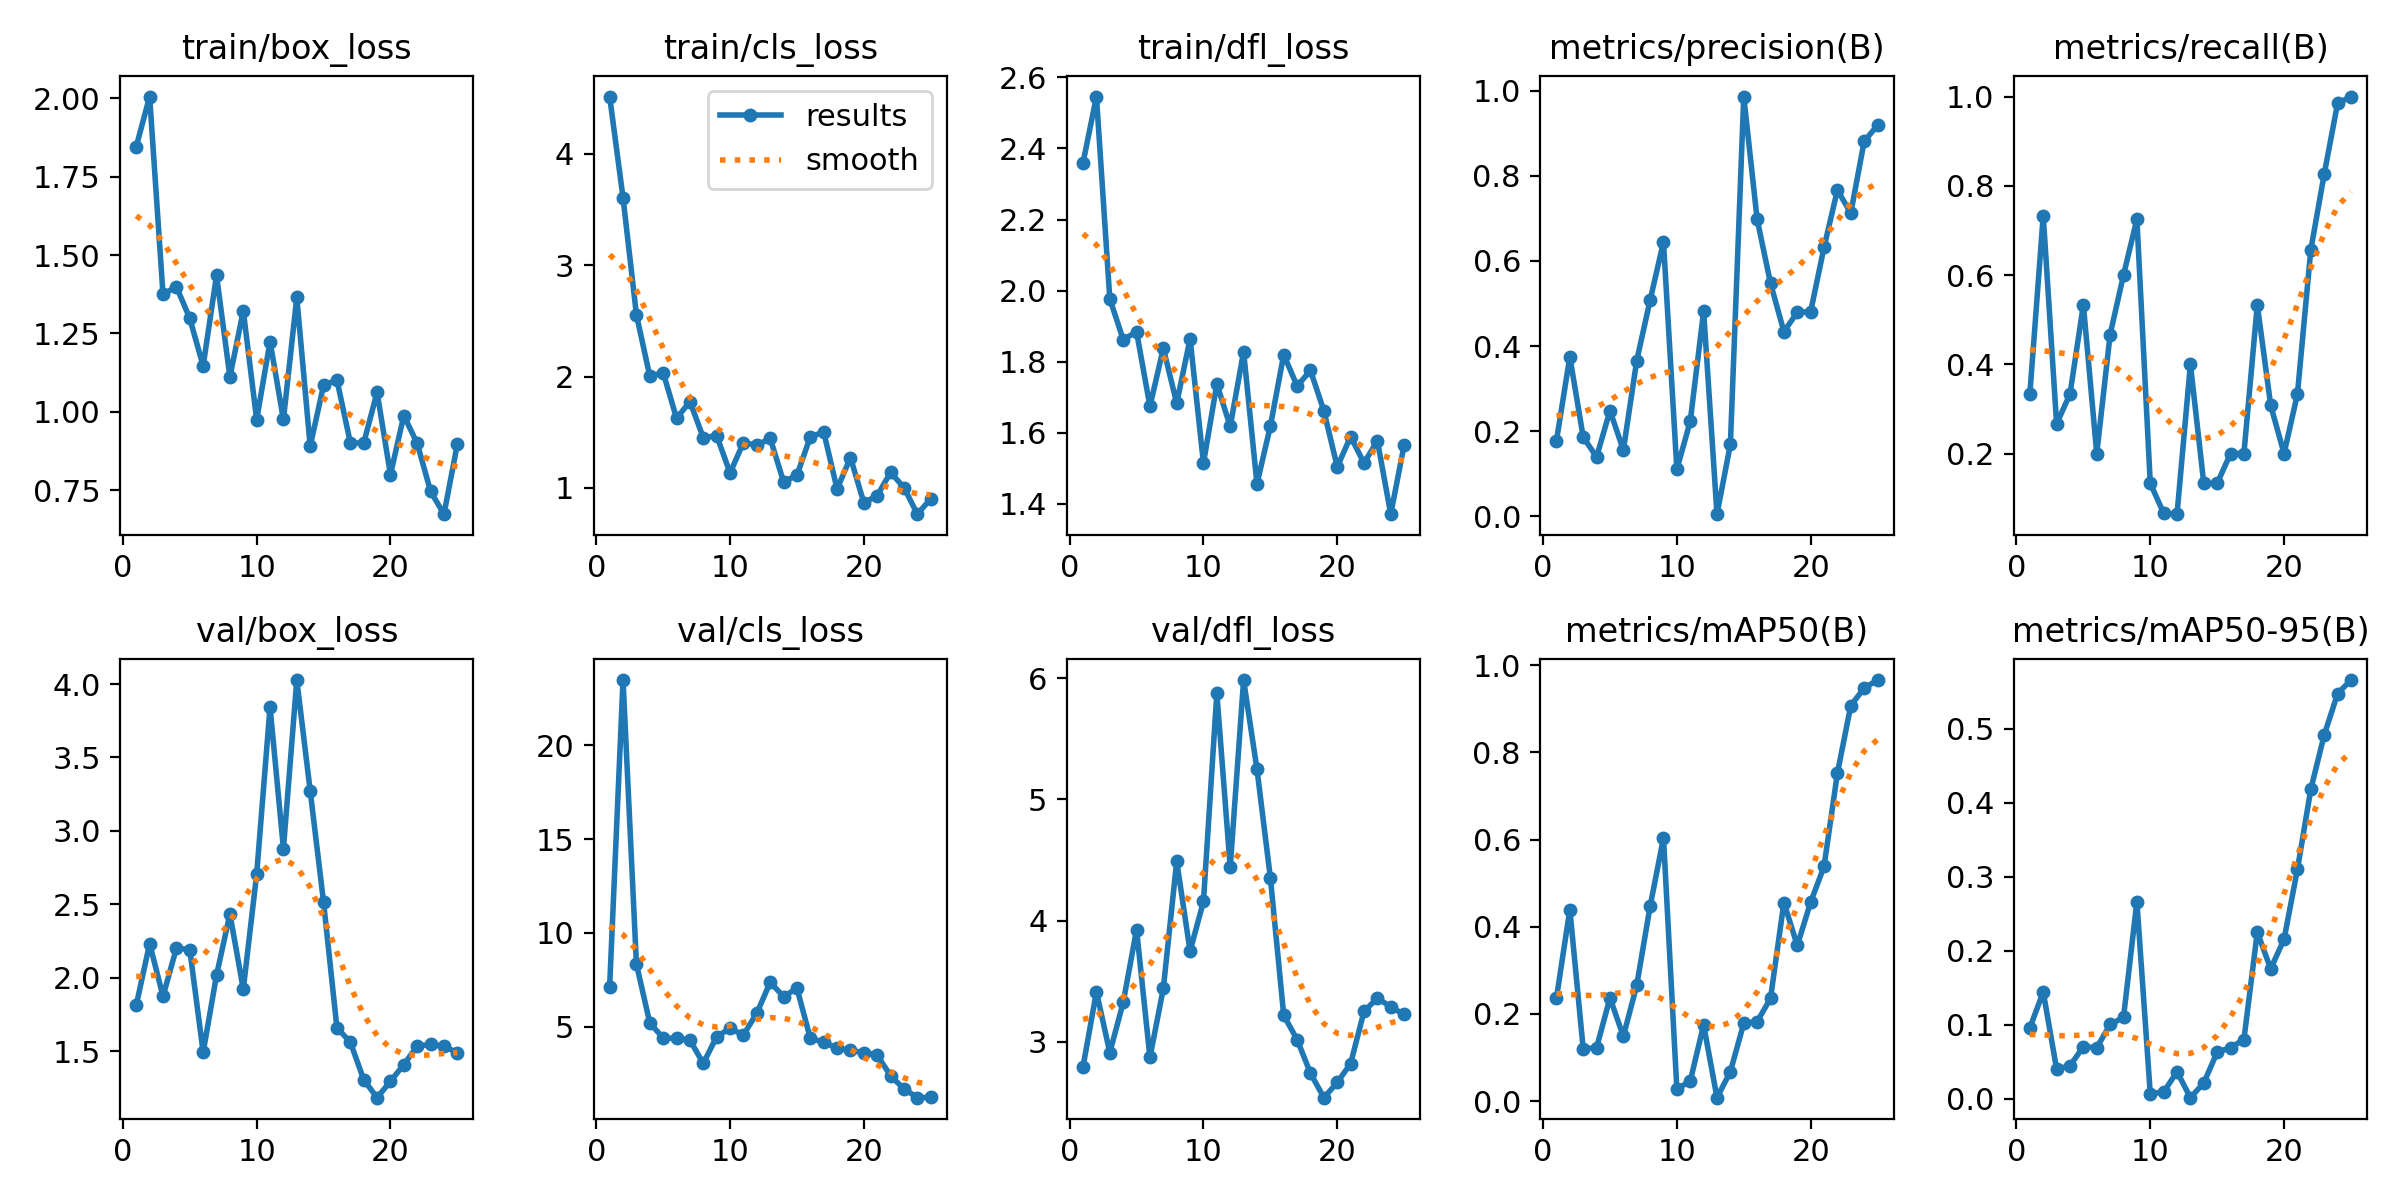

In [10]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

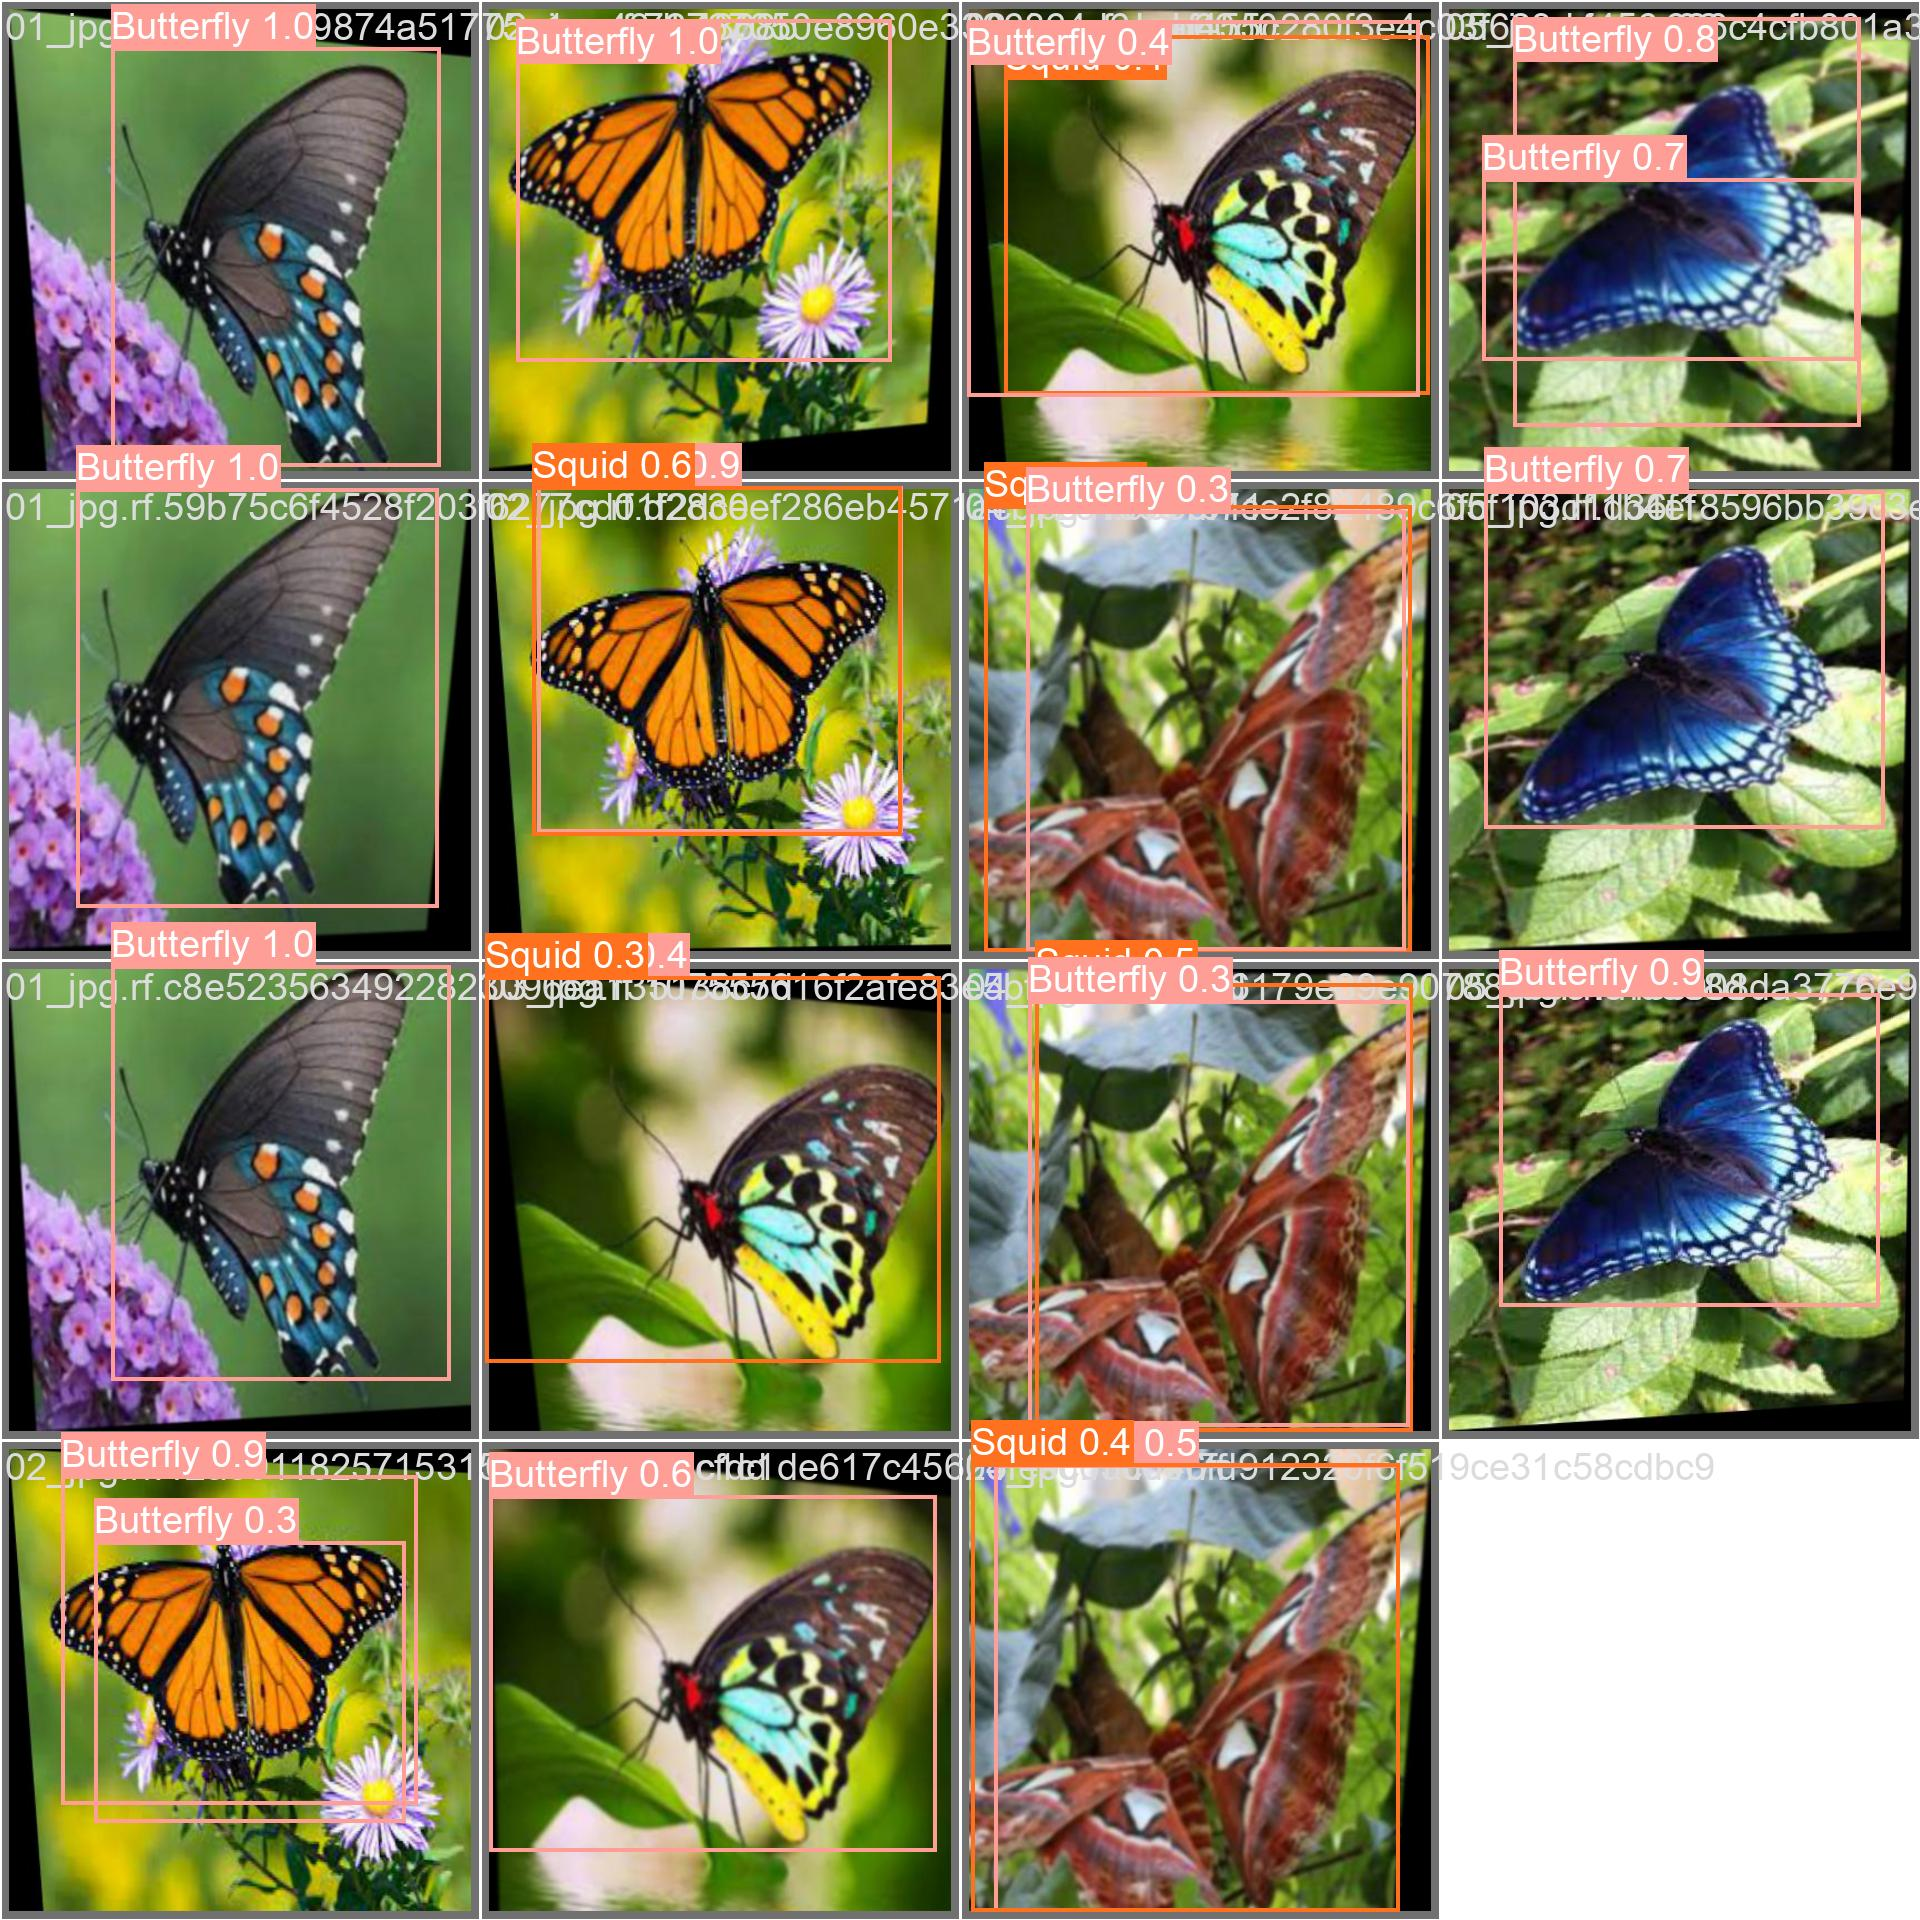

In [11]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Butterfly/images/data.yaml

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Butterfly/labels/val.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.15s/it]
                   all         15         15      0.919          1      0.966      0.568
             Butterfly         15         15      0.919          1      0.966      0.568
Speed: 0.7ms preprocess, 21.2ms inference, 0.0ms loss, 42.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


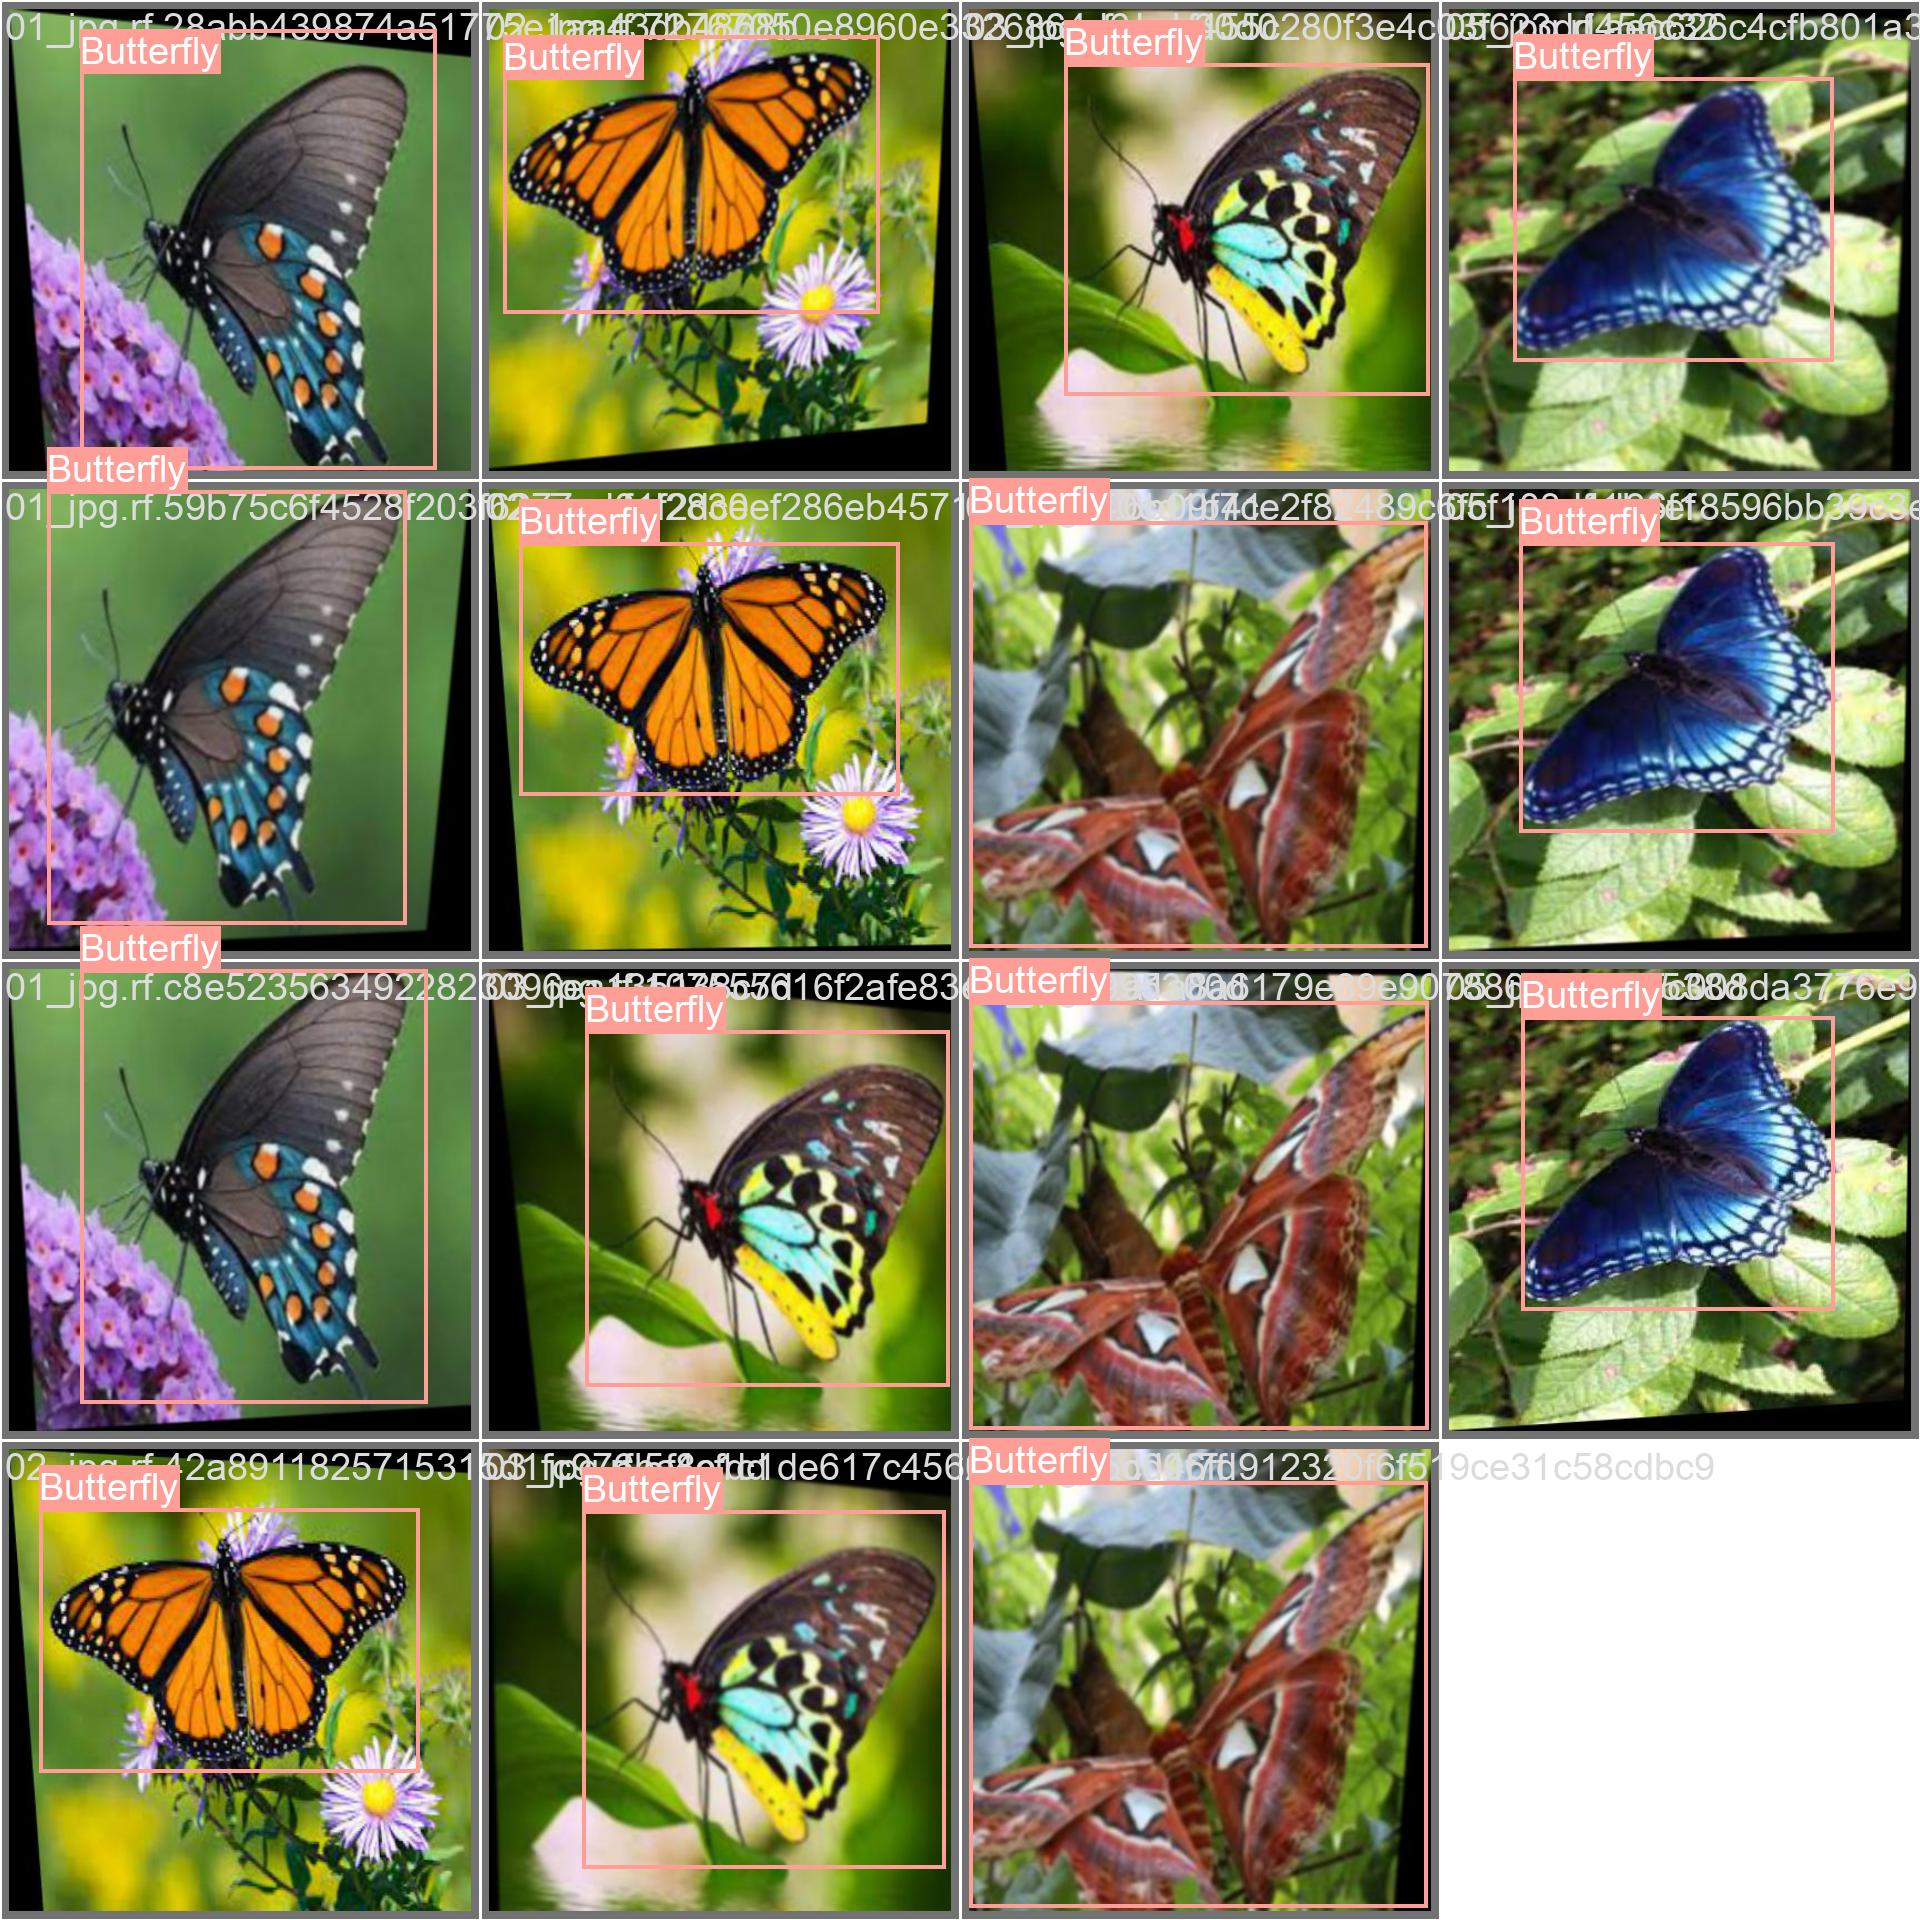

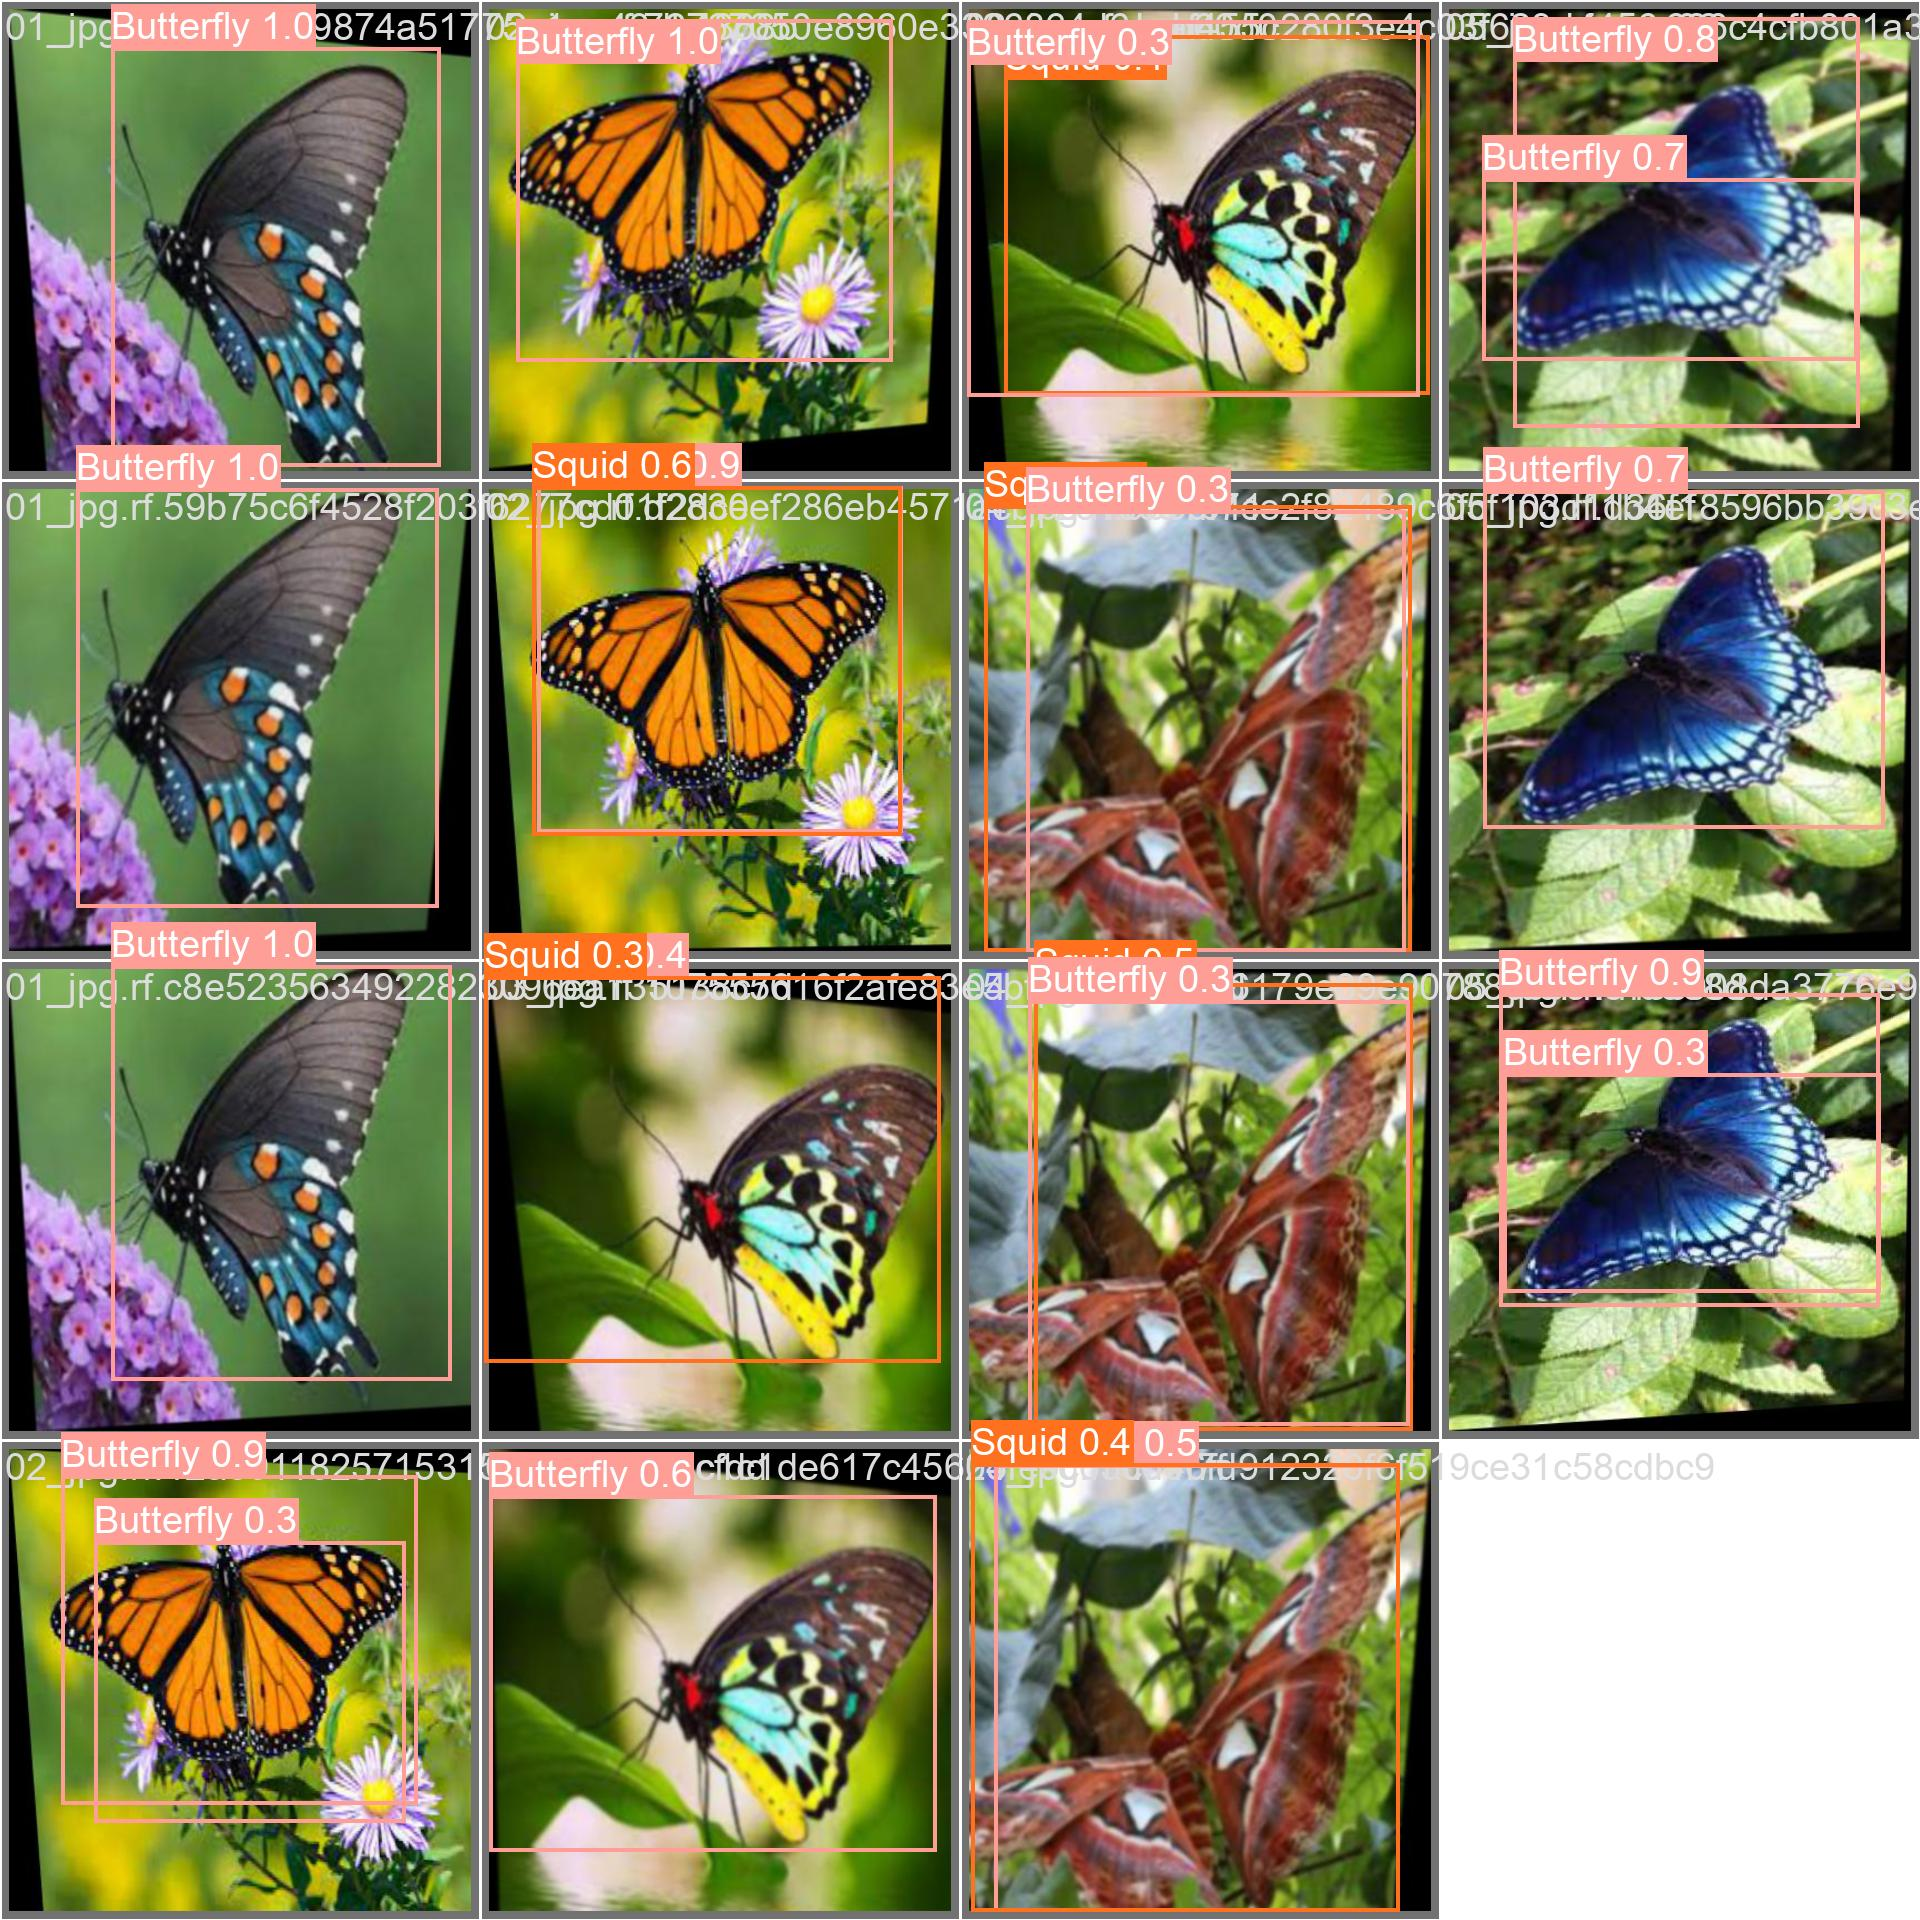

In [15]:
import glob
for image_path in glob.glob(f'/content/runs/detect/val/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))
      print("\n")